In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

#**Прогнозирование сердечных заболеваний**
---

###Как известно сердечно-сосудистые заболевания остаются одной из ведущих причин смерти по всему миру. Данный датасет предоставляет возможность провести анализ факторов, влияющих на здоровье сердечно-сосудистой системы человека, что может помочь в разработке эффективных стратегий профилактики и лечения. Теперь давайте более детально рассмотрим структуру и содержание этого датасета.

##**Задача**

Научиться прогнозировать возможное возникновение сердечно-сосудистых заболеваний методами машинного обучения

##**Описание датасета**




*   Объем данных: **445132** записи
*   Количество признаков: **40**
*   Количество классов: **2**
*   Типы и описание признаков:
  *   `State` (Штат, в котором проживает человек) - категориальный
  *   `Sex` (Пол человека) - категориальный
  *   `GeneralHealth` (Общее состояние здоровья, часто оцениваемое на основе самоотчетов) - категориальный
  *   `PhysicalHealthDays` (Количество дней, когда физическое здоровье было плохим за последние 30 дней, опять же на основе самоотчетов) - количественный
  *   `MentalHealthDays` (Количество дней, когда психическое здоровье было плохим за последние 30 дней, опять же на основе самоотчетов) - количественный
  *   `LastCheckupTime` (Когда был последний медицинский осмотр) - категориальный
  *   `PhysicalActivities` (Активный ли образ жизни) - бинарный
  *   `SleepHours` (Количество часов сна в среднем за ночь) - количественный
  *   `RemovedTeeth` (Количество удаленных зубов) - категориальный
  *   `HadHeartAttack` (Был ли сердечный приступ) - бинарный
  *   `HadAngina` (Была ли стенокардия) - бинарный
  *   `HadStroke` (Был ли инсульт) - бинарный
  *   `HadAsthma` (Была ли астма) - бинарный
  *   `HadSkinCancer` (Был ли рак кожи) - бинарный
  *   `HadCOPD` (Была ли хроническая обструктивная болезнь легких (ХОБЛ)) - бинарный
  *   `HadDepressiveDisorder` (Было ли депрессивное расстройство) - бинарный
  *   `HadKidneyDisease` (Была ли болезнь почек) - бинарный
  *   `adArthritis` (Был ли артрит) - бинарный
  *   `HadDiabetes` (Был ли диабет) - категориальный
  *   `DeafOrHardOfHearing` (Есть ли проблемы со слухом) - бинарный
  *   `BlindOrVisionDifficulty` (Имеет ли проблемы со зрением или слепоту) - бинарный
  *   `DifficultyConcentrating` (Есть ли трудности с концентрацией) - бинарный
  *   `DifficultyWalking` (Есть ли трудности с ходьбой) - бинарный
  *   `DifficultyDressingBathing` (Есть ли трудности с одеванием/купанием) - бинарный
  *   `DifficultyErrands` (Есть ли трудности с выполнением повседневных дел) - бинарный
  *   `SmokerStatus` (Статус курильщика (например, курит, бросил)) - категориальный
  *   `ECigaretteUsage` (Использует ли электронные сигареты) - категориальный
  *   `ChestScan` (Делал ли сканирование грудной клетки) - бинарный
  *   `RaceEthnicityCategory` (Категория расы и этнической принадлежности) - категориальный
  *   `AgeCategory` (Категория возраста) - категориальный
  *   `HeightInMeters` (Рост в метрах) - количественный
  *   `WeightInKilograms` (Вес в килограммах) - количественный
  *   `BMI` (Индекс массы тела) - количественный
  *   `AlcoholDrinkers` (Пьет ли алкоголь) - бинарный
  *   `HIVTesting` (Делал ли тестирование на ВИЧ) - бинарный
  *   `FluVaxLast12` (Делал ли прививку от гриппа за последние 12 месяцев) - бинарный
  *   `PneumoVaxEver` (Делал ли прививку от пневмококка когда-либо) - бинарный
  *   `TetanusLast10Tdap` (Делал ли прививку от столбняка за последние 10 лет) - категориальный
  *   `HighRiskLastYear` (Был ли в высокой группе риска в течение последнего года) - бинарный
  *   `CovidPos` (Положительный ли результат теста на COVID-19) - категориальный
* **Есть** пропущенные значения
* Классы **несбалансированы**












## Чтение данных

In [6]:
# С google disk
#  data_raw = pd.read_csv('/content/<path>/heart_2022_with_nans.csv')

#
url = "https://media.githubusercontent.com/media/DDYunin/ML_course_NNGU/main/heart_2022_with_nans.csv"
data_raw = pd.read_csv(url)

HTTPError: HTTP Error 404: Not Found

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [2]:
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['heart_2022_with_nans.csv']))

NameError: name 'uploaded' is not defined

In [5]:
data_raw

NameError: name 'data_raw' is not defined

In [4]:
# Посмотреть столбец отдельно на уникальные значения
data_raw['AgeCategory'].unique()

array(['Age 80 or older', 'Age 55 to 59', nan, 'Age 40 to 44',
       'Age 75 to 79', 'Age 70 to 74', 'Age 65 to 69', 'Age 60 to 64',
       'Age 50 to 54', 'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29',
       'Age 30 to 34', 'Age 18 to 24'], dtype=object)

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

## Визуализация данных, основные значения

In [6]:
data_raw.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [7]:
corr_matrix = data_raw.corr(numeric_only=True)
corr_matrix

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
PhysicalHealthDays,1.000000,0.321349,-0.055906,-0.050867,0.072838,0.112865
MentalHealthDays,0.321349,1.000000,-0.129075,-0.049473,0.040345,0.075891
SleepHours,-0.055906,-0.129075,1.000000,-0.014668,-0.053521,-0.050805
HeightInMeters,-0.050867,-0.049473,-0.014668,1.000000,0.467892,-0.028349
WeightInKilograms,0.072838,0.040345,-0.053521,0.467892,1.000000,0.859557
BMI,0.112865,0.075891,-0.050805,-0.028349,0.859557,1.000000


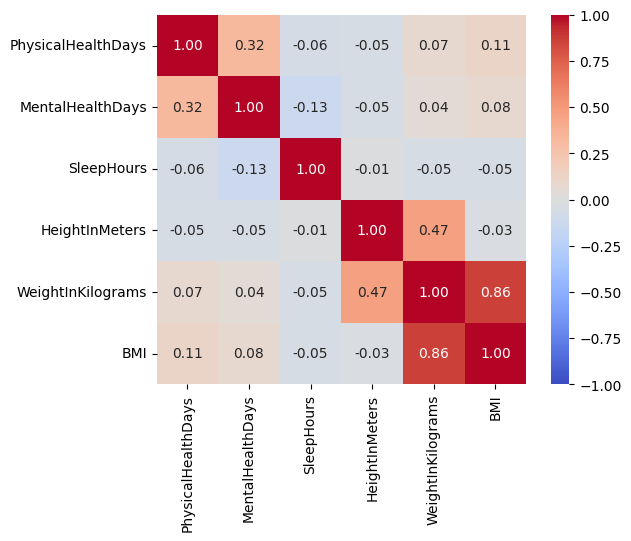

In [8]:
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Исходя из вида данной матрицы, можно сделать следующие выводы:

* Наблюдается немалая корреляция между физическим и психическим состоянием
* Индекс массы тела напрямую зависит от веса, что очевидно
* Психическое состояние отрицательно коррелирует с показателелем количество часов сна
* Есть некая корреляция между физическим состоянием и индексом массы тела


### Продолжение визуализации и интерпретации некоторых данных

Зависимость наличия сердечных заболеваний от возраста:

In [9]:
HadHeartAttack_AgeCategory = data_raw.groupby(['AgeCategory', 'HadHeartAttack'], as_index=False).agg(n = ('AgeCategory', 'count'))
HadHeartAttack_AgeCategory

,AgeCategory,HadHeartAttack,n
0,Age 18 to 24,No,26676
1,Age 18 to 24,Yes,122
2,Age 25 to 29,No,21782
3,Age 25 to 29,Yes,119
4,Age 30 to 34,No,25508
5,Age 30 to 34,Yes,187
6,Age 35 to 39,No,28067
7,Age 35 to 39,Yes,318
8,Age 40 to 44,No,29347
9,Age 40 to 44,Yes,445


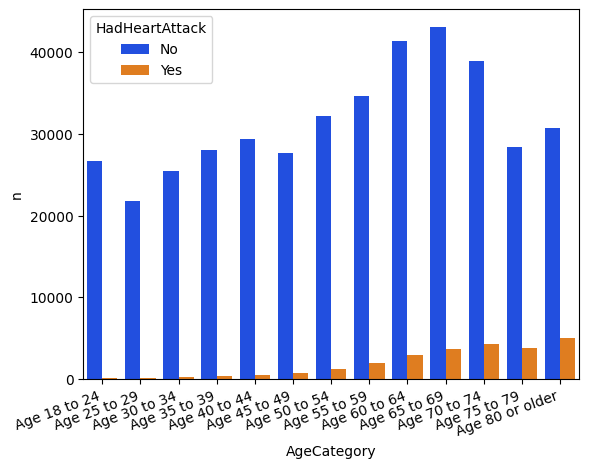

In [10]:
plt.xticks(rotation=20, ha='right')
sns.barplot(data=HadHeartAttack_AgeCategory, x='AgeCategory', y='n', hue="HadHeartAttack", palette='bright')
pass

Итоги:
* Чем выше возраст, тем большее число людей страдают от сердечных заболеваний
* Наблюдается активный рост сердечных заболеваний после 40

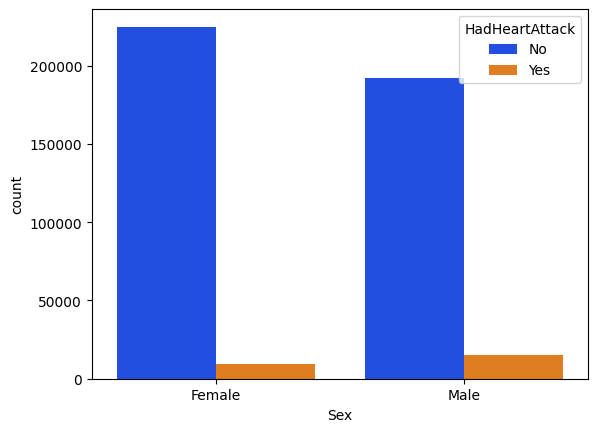

In [11]:
sns.countplot(data=data_raw, x='Sex', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* Мужчины больше подвержены сердечным заболеванием, чем женщины

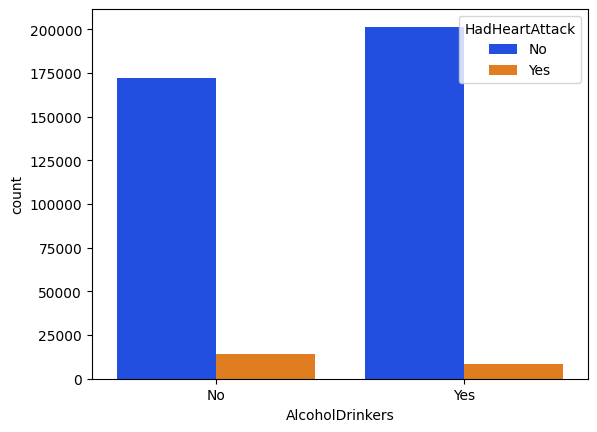

In [12]:
sns.countplot(data=data_raw, x='AlcoholDrinkers', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* Меньшая часть выпивающих людей подтвергаются риску сердечных заболеваний

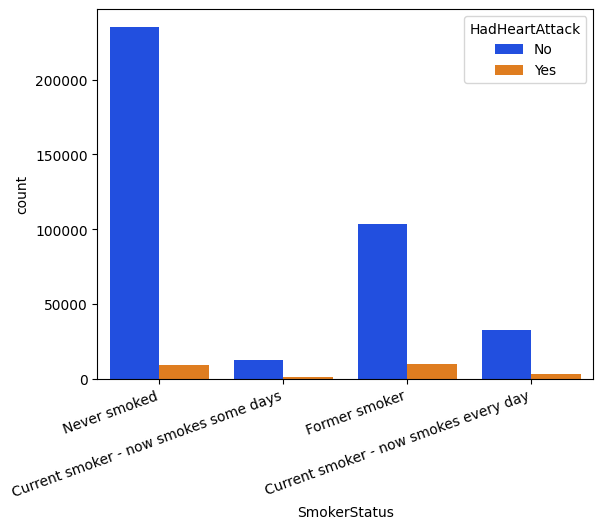

In [13]:
plt.xticks(rotation=20, ha='right')
sns.countplot(data=data_raw, x='SmokerStatus', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* У курящих людей риск сердечных заболеваний значительно выше тех, кто не курит


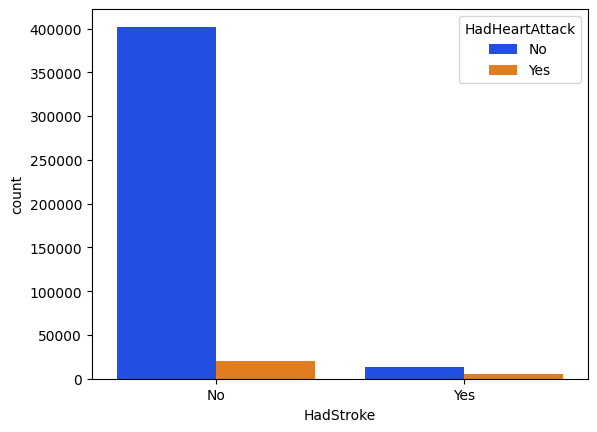

In [14]:
sns.countplot(data=data_raw, x='HadStroke', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* Около трети людей, у кого случался инсульт, страдают от сердечно-сосудистых заболеваний

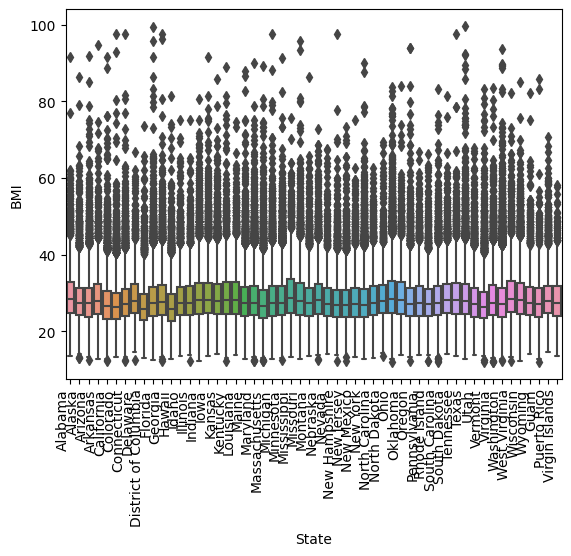

In [15]:
plt.xticks(rotation=90, ha='right')
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(x="State", y="BMI", data=data_raw)
pass

Итоги:

* Наибольший индекс тела имеют люди из штата Миссисипи
* Наименьший индекс тела имеют люди из штата Гаваи и Район Колумбии

## Борьба с пропущенными значениями

Проверка пропущенных значений

In [16]:
data_raw.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

Избавимся от строк, у которых колонка HadHeartAttack имеет пропущенное значение, так как мы не можем корректно заполнить данное поле

In [17]:
data = data_raw.dropna(subset=['HadHeartAttack'])
data = data.dropna(subset=['RaceEthnicityCategory'])
data = data.dropna(subset=['AgeCategory'])
data = data.dropna(subset=['HighRiskLastYear'])

Борьба с пропущенными значениями количественных переменных: заполнение пропущенных значений медианой

In [18]:
data = data.fillna(data.median(axis=0), axis=0)

<ipython-input-18-4634965d352c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median(axis=0), axis=0)


In [ ]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                  811
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime               6213
PhysicalActivities             694
SleepHours                       0
RemovedTeeth                  8359
HadHeartAttack                   0
HadAngina                     3030
HadStroke                      859
HadAsthma                     1167
HadSkinCancer                 2301
HadCOPD                       1443
HadDepressiveDisorder         1860
HadKidneyDisease              1281
HadArthritis                  1853
HadDiabetes                    598
DeafOrHardOfHearing           1205
BlindOrVisionDifficulty        981
DifficultyConcentrating       2242
DifficultyWalking             1177
DifficultyDressingBathing      473
DifficultyErrands             1028
SmokerStatus                  2442
ECigaretteUsage               1251
ChestScan                    15559
RaceEthnicityCategor

Борьба с пропущенными значениями номинальных переменных: заполнение пропущеных значений модой

In [19]:
# Признак - общий показатель здоровья
data['GeneralHealth'].fillna(data['GeneralHealth'].mode().iloc[0], inplace=True)

# Признак - последнее вермя проверки
data['LastCheckupTime'].fillna(data['LastCheckupTime'].mode().iloc[0], inplace=True)

# Признак - ведёт ли человек активный образ жизни
data['PhysicalActivities'].fillna(data['PhysicalActivities'].mode().iloc[0], inplace=True)

# Признак - была ли у человека стенокардия
data['HadAngina'].fillna(data['HadAngina'].mode().iloc[0], inplace=True)

# Признак - был ли у человека инсульт
data['HadStroke'].fillna(data['HadStroke'].mode().iloc[0], inplace=True)

# Признак - была ли у человека астма
data['HadAsthma'].fillna(data['HadAsthma'].mode().iloc[0], inplace=True)

# Признак - был ли у человека рак кожи
data['HadSkinCancer'].fillna(data['HadSkinCancer'].mode().iloc[0], inplace=True)

# Признак - был ли у человека заболеваний легких
data['HadCOPD'].fillna(data['HadCOPD'].mode().iloc[0], inplace=True)

# Признак - был ли у человека депрессивные расстройства
data['HadDepressiveDisorder'].fillna(data['HadDepressiveDisorder'].mode().iloc[0], inplace=True)

# Признак - было ли у человека заболевание почек
data['HadKidneyDisease'].fillna(data['HadKidneyDisease'].mode().iloc[0], inplace=True)

# Признак - был ли у человека артрит
data['HadArthritis'].fillna(data['HadArthritis'].mode().iloc[0], inplace=True)

# Признак - был ли диабет
data['HadDiabetes'].fillna(data['HadDiabetes'].mode().iloc[0], inplace=True)

# Признак - были ли проблемы со слухом
data['DeafOrHardOfHearing'].fillna(data['DeafOrHardOfHearing'].mode().iloc[0], inplace=True)

# Признак - были ли проблемы со зрением
data['BlindOrVisionDifficulty'].fillna(data['BlindOrVisionDifficulty'].mode().iloc[0], inplace=True)

# Признак - были ли проблемы с концентрацией
data['DifficultyConcentrating'].fillna(data['DifficultyConcentrating'].mode().iloc[0], inplace=True)

# Признак - трудности передвижения
data['DifficultyWalking'].fillna(data['DifficultyWalking'].mode().iloc[0], inplace=True)

# Признак - сложности с одеванием и мытьём
data['DifficultyDressingBathing'].fillna(data['DifficultyDressingBathing'].mode().iloc[0], inplace=True)

# Признак - сложности выполнения в повседневных делах
data['DifficultyErrands'].fillna(data['DifficultyErrands'].mode().iloc[0], inplace=True)

# Признак - статус курения
data['SmokerStatus'].fillna(data['SmokerStatus'].mode().iloc[0], inplace=True)

# Признак - Курит ли электронные сигареты
data['ECigaretteUsage'].fillna(data['ECigaretteUsage'].mode().iloc[0], inplace=True)

# Признак - проходил ли обследование грудной клетки
data['ChestScan'].fillna(data['ChestScan'].mode().iloc[0], inplace=True)

# Признак - пьёт ли алкоголь
data['AlcoholDrinkers'].fillna(data['AlcoholDrinkers'].mode().iloc[0], inplace=True)

# Признак - статус теста на ковид
data['CovidPos'].fillna(data['CovidPos'].mode().iloc[0], inplace=True)

Некоторые признаки можно удалить из наших данных, так как сильного эффекта они не будут давать, например, признак RemovedTeeth.

In [20]:
# Удалим столбец 'RemovedTeeth'
data = data.drop('RemovedTeeth', axis=1)

# Удалим столбец 'HIVTesting'
data = data.drop('HIVTesting', axis=1)

# Удалим столбец 'FluVaxLast12'
data = data.drop('FluVaxLast12', axis=1)

# Удалим столбец 'PneumoVaxEver'
data = data.drop('PneumoVaxEver', axis=1)

# Удалим столбец 'TetanusLast10Tdap'
data = data.drop('TetanusLast10Tdap', axis=1)

Пропущенных значений не осталось:

In [21]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholD

In [22]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Бинаризация категориальных признаков

Необходимо закодировать категориальные признаки с помощью числовых, для дальнейшего применения методов машинного обучения библиотеки **scikit-learn**

Разделим наши признаки на категориальные и числовые

In [23]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos']
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [24]:
data_describe = data.describe(include = [object])

Разделим категориальные признаки на бинарные и небинарные

In [25]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HighRiskLastYear'] ['State', 'GeneralHealth', 'LastCheckupTime', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'CovidPos']


In [26]:
# Покажем все уникальные значения для наших очищенных данных
for data_column in data.columns:
  print(data_column, ' - ', data[data_column].unique(), '\n')

State  -  ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex  -  ['Female' 'Male'] 

GeneralHealth  -  ['Very good' 'Excellent' 'Fair' 'Poor' 'Good'] 

PhysicalHealthDays  -  [ 0.  2.  1.  8.  5. 30.  4. 23. 14. 15.  3. 10.  7. 25.  6. 21. 20. 29.
 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 18. 19. 22.] 

MentalHealthDays  -  [ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1.  2. 30.  4.  6.  7. 25.  8. 27.
 21

Определим бинарные данные

In [27]:
binary_data = data[binary_columns];

In [28]:
binary_data

,Sex,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HighRiskLastYear
0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Female,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Female,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Female,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
5,Male,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,Male,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
445127,Female,Yes,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No
445128,Female,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
445130,Male,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No


In [29]:
for column in binary_columns:
  binary_data[column] = pd.factorize(binary_data[column])[0]

<ipython-input-29-8f96b426e8c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data[column] = pd.factorize(binary_data[column])[0]
<ipython-input-29-8f96b426e8c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data[column] = pd.factorize(binary_data[column])[0]
<ipython-input-29-8f96b426e8c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [30]:
binary_data

,Sex,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HighRiskLastYear
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
445127,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
445128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
445130,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Данные для небинарных категориальных признаков (происходит их векторизация)

In [31]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)
data_nonbinary

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       'State_Georgia', 'State_Guam', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Puerto Rico', 'State_Rhode Island', 'State_South Carolina',
       'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah',
       'State_Vermont', 'Stat

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
445127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
445128,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
445130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000
mean,4.247553,4.318896,7.026899,1.702550,83.117375,28.516036
std,8.586380,8.296829,1.464856,0.105962,20.947913,6.368334
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.370000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000
75%,3.000000,4.000000,8.000000,1.780000,92.990000,31.380000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


## Нормализация колличественных признаков
Поскольку многие алгоритмы машинного обучения чувствительны к масштабированию данных, колличественные признаки полезно нормализовать (если один признак принимает значения от 0 до 1, а другой от 0 до 1000, то у последнего будет преимщество, поэтому нормализуем данные).

Стандартизация всех признаков:

In [33]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,3.760000e+05,3.760000e+05,3.760000e+05,3.760000e+05,3.760000e+05,3.760000e+05
mean,-8.435805e-17,-2.358397e-17,1.623666e-16,-3.267892e-15,-2.310020e-16,1.617921e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.946850e-01,-5.205479e-01,-4.114328e+00,-7.479562e+00,-2.885126e+00,-2.590322e+00
25%,-4.946850e-01,-5.205479e-01,-7.010238e-01,-6.846809e-01,-7.197555e-01,-6.510393e-01
50%,-4.946850e-01,-5.205479e-01,-1.836285e-02,-2.406746e-02,-9.200796e-02,-1.689666e-01
75%,-1.452944e-01,-3.843592e-02,6.642981e-01,7.309193e-01,4.712940e-01,4.497195e-01
max,2.999220e+00,3.095292e+00,1.158687e+01,6.676440e+00,9.998735e+00,1.116838e+01


In [34]:
final_data = pd.concat((data_numerical, data_nonbinary, binary_data), axis = 1)
print(data.shape)

(376000, 35)


In [35]:
final_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,...,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HighRiskLastYear
0,-0.494685,-0.520548,0.664298,-0.024067,-0.092008,-0.168967,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.494685,-0.520548,-0.701024,-0.967801,-0.719755,-0.305580,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.261758,-0.158964,-1.383685,-1.250921,-0.936483,-0.456326,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.261758,-0.520548,1.346959,-1.250921,-1.390944,-1.059309,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,-0.378221,-0.520548,-0.018363,0.919666,0.081279,-0.382523,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,-0.494685,-0.520548,0.664298,1.202786,1.012637,0.419884,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
445127,-0.494685,-0.158964,-0.701024,-0.495934,-0.633351,-0.453185,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
445128,-0.261758,-0.279492,-0.018363,-0.024067,-0.005126,0.022606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445130,-0.494685,-0.520548,-1.383685,1.202786,1.228887,0.633441,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Разбиение данных на обучающую и тестовую выборки

In [36]:
X = final_data.drop('HadHeartAttack', axis = 1)
y = final_data['HadHeartAttack']

In [37]:
# Итоговые размеры данных
final_data.shape

(376000, 122)

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Метод k ближайших соседей и оценка результатов

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

**Для 10 соседей:**

In [40]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [41]:
accuracy_score(y_train, y_train_predict)

0.9446560283687944

Точность на тренировочной выборке:

In [42]:
accuracy_score(y_test, y_test_predict)

0.9439893617021277

Среднеквадратичная ошибка на обучающей выборке:

In [43]:
mean_squared_error(y_train, y_train_predict)

0.05534397163120568

Среднеквадратичная ошибка на тренировочной выборке:

In [44]:
mean_squared_error(y_test, y_test_predict)

0.05601063829787234

**Для 5 соседей:**

In [45]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [46]:
accuracy_score(y_train, y_train_predict)

0.9494787234042553

Точность на тренировочной выборке:

In [47]:
accuracy_score(y_test, y_test_predict)

0.9425

Среднеквадратичная ошибка на обучающей выборке:

In [48]:
mean_squared_error(y_train, y_train_predict)

0.05052127659574468

Среднеквадратичная ошибка на тренировочной выборке:

In [49]:
mean_squared_error(y_test, y_test_predict)

0.0575

## Общие выводы

В данной работе реализовано обучение модели машинного обучения посредством метода k ближайших соседей, предсказывающей наличие сердечных заболеваний у человека.

Лучше всего себя показал knn(n=10), так как имеет наименьшую ошибку на тесте. У knn(n=5) ошибка больше, но различия в тысячные (десятые доли процента)

Такое небольшое значение ошибки можно обосновать тем, что признаки из датасета хорошо подобраны: с помощью них довольно неплохо получается предсказать наличие сердечных заболеваний.







## RandomForest

In [59]:
from sklearn import ensemble

**Модель машинного обучения (100 решающих деревьев)**

In [73]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

**Ошибки на обучающей и тестовой выборках**

In [74]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

2.8368794326241135e-05 0.05376595744680851


In [75]:
accuracy_score(y_test, rf.predict(X_test))

0.9462340425531914

**Матрица рассогласования**

In [76]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf.predict(X_test)))

[[88254   463]
 [ 4591   692]]


**Модель машинного обучения (1000 решающих деревьев)**

In [60]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

**Ошибки на обучающей и тестовой выборках**

In [61]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

3.546099290780142e-06 0.05347872340425532


In [69]:
accuracy_score(y_test, rf.predict(X_test))

0.9465212765957447

**Матрица рассогласования**

In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf.predict(X_test)))

[[88265   452]
 [ 4575   708]]


## Логистическая регрессия

In [65]:
from sklearn.linear_model import LogisticRegression

**Выбор оптимального значения гиперпараметра C**



In [128]:
param_c_array = np.logspace(-3,3,10)

In [129]:
logistic_model = LogisticRegression()

params = {
    'C': param_c_array
}

In [130]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(logistic_model,
                  params,
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [131]:
gs.best_params_

{'C': 0.004641588833612777}

**Обучение модели с оптимальным значением гиперпараметра**

In [132]:
logistic_model = LogisticRegression(C=gs.best_params_['C'])
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.004641588833612777)

**Ошибки на обучающей и тестовой выборках**

In [133]:
err_train_logistic = np.mean(y_train != logistic_model.predict(X_train))
err_test_logistic  = np.mean(y_test  != logistic_model.predict(X_test))

print(err_train, err_test)

0.010879432624113476 0.08127659574468085


**Матрица рассогласования**

In [134]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, logistic_model.predict(X_test)))

[[87931   786]
 [ 4163  1120]]


**График ошибки в зависимости от гиперпараметра C**

In [135]:
error_array = []
for param_c in param_c_array:
  model = LogisticRegression(C = param_c)
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  current_error  = np.mean(y_test  != predict)
  error_array.append(current_error)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[]

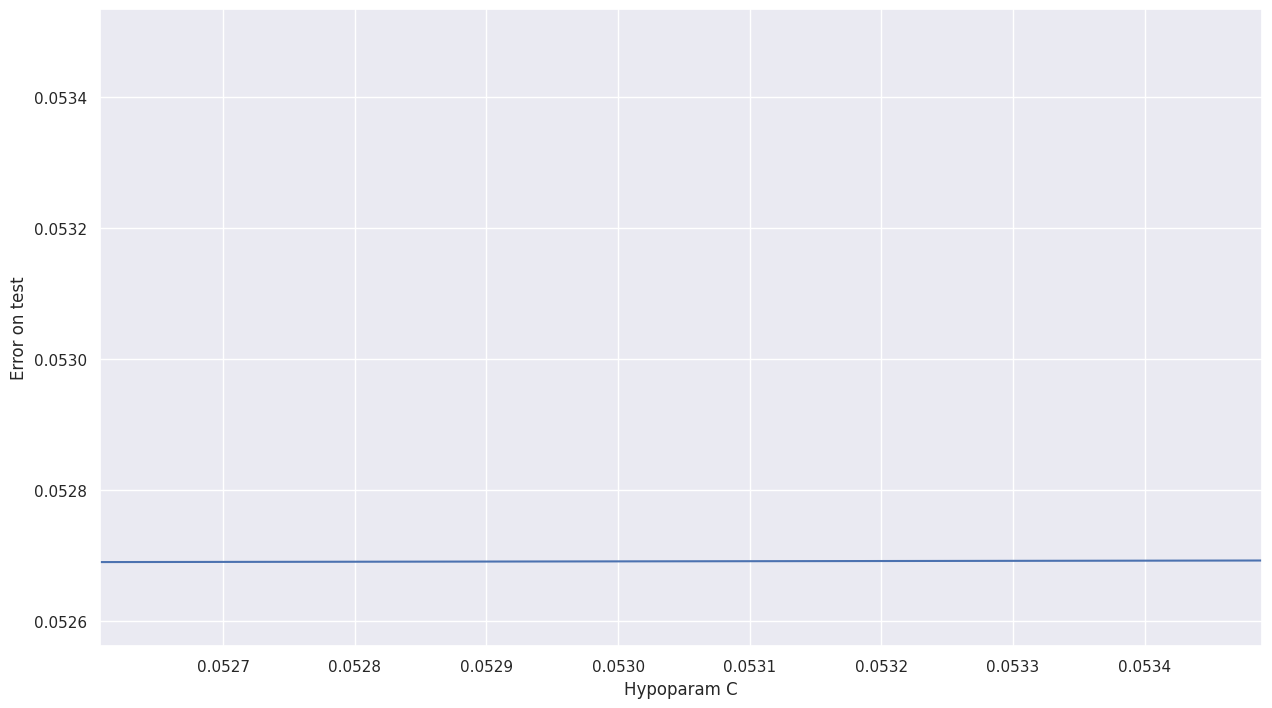

In [136]:
plt.xlim([np.min(error_array), np.max(error_array)])
plt.plot(param_c_array, error_array)
plt.ylabel('Error on test')
plt.xlabel('Hypoparam C')
plt.plot()

## Общие выводы

Были обучены разные модели машинного обучения и проделан процесс выбора оптимального гиперпараметра. Также для моделей были построены матрицы рассогласования.

Cитуация, при которой результат на выборке для обучения лучше других, наблюдается для Логистической регрессии. Это может говорить о переобучении.

Наименьшую ошибку показала модель машинного обучения - RandomForest при количестве деревьев (гиперпараметр) = 1000